In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:42:58 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:42:58 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:42:58 INFO: Setting time scale factor to 1.0.
2019-05-17 14:42:58 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:42:58 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:42:58 INFO: Starting execution process
2019-05-17 14:43:03 INFO: Time 0:00:03.877181 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:43:14 INFO: Time 0:00:10.967066 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:21 INFO: Time 0:00:07.392698 taken by PartitionAndPlacePartitioner
Created spalloc job 4642684
2019-05-17 14:43:21 INFO: Created spalloc job 4642684
Waiting for board power commands to complete.
2019-05-17 14:43:21 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:26 INFO: Time 0:00:05.057228 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:38 INFO: Time 0:00:00.023947 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:38 INFO: Time 0:00:00.038756 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:38 INFO: Time 0:00:00.148988 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:39 INFO: Time 0:00:00.541119 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:39 INFO: Time 0:00:00.049304 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:40 INFO: Time 0:00:01.442632 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([  457.,   981.,  3498.,  3762.,  4584.,  6122.,  7819., 10679.,
       11255., 11637., 13217., 13361., 13888., 14089., 14519., 15687.,
       16737., 17102., 17250., 17492., 18535., 20862., 22044., 22516.,
       22624., 23043., 24709., 27164., 28623., 30175., 30947., 35675.,
       36308., 38432., 39122., 41113., 42087., 42833., 42932., 43054.,
       44590., 44749., 44836., 46786., 47684., 48186., 50597., 50986.,
       52042., 53686., 53810., 54011., 59262., 59871., 59948., 60925.,
       61667., 62618., 64136., 66008., 66537., 67408., 68929., 69001.,
       71145., 71560., 72821., 73962., 74336., 74495., 74967., 77944.,
       78503., 81107., 81707., 82386., 85546., 87972., 88397., 89176.,
       90129., 90359., 91226., 91568., 92109., 92162., 92265., 92938.,
       93725., 94022., 94702., 95947., 96662., 98002., 98224., 98840.,
       99613.]) * ms, [0.0 ms, 100000.0 ms])>]
97


## Plot:

<IPython.core.display.Javascript object>


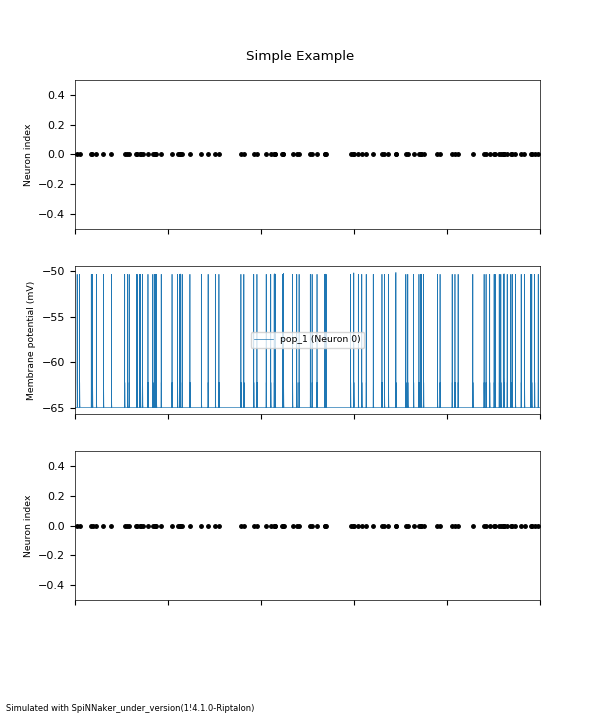

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()